<a href="https://colab.research.google.com/github/Justduzi/Neural-Network-Regression/blob/main/Medical_Insurance(Neural_Network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MEdical Cost Data Set Kaggle/Github

In [ ]:
#Import Libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read Data from Github
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
#Create feautures and labels
X = insurance_one_hot.drop("charges", axis=1)
Y = insurance_one_hot["charges"]


In [ ]:
#view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
#view Y
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
#Train test Split scikitlearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
#Build Neural Network
tf.random.set_seed(42)
#Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
#compile model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                        metrics=["mae"])
#Fit model
history = insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 12816.6123 - mae: 12816.6123
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 8691.3799 - mae: 8691.3799
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7416.8496 - mae: 7416.8496
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7238.1631 - mae: 7238.1631
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7148.7202 - mae: 7148.7202
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7032.5796 - mae: 7032.5796
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 6913.5605 - mae: 6913.5605
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 6769.1440 - mae: 6769.1440
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 6653.7939 - mae: 6653.7939
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 6602.2593 - mae: 6602.25

In [ ]:
#Check result
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3175.4165 - mae: 3175.4165


[3175.41650390625, 3175.41650390625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Text(0.5, 0, 'epochs')

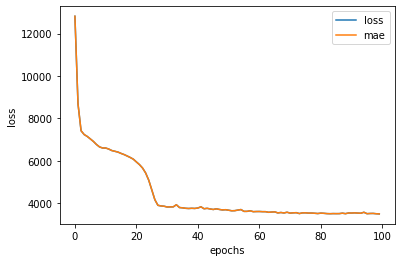

In [ ]:
#Plot history (also known as a loss curve or training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
#Set random seed
tf.random.set_seed(42)
#Create model
insurance_model2= tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
#Compile model
insurance_model2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.08),
                        metrics=["mae"])
#Fit
history2 = insurance_model2.fit(X_train, y_train, epochs=175)

Epoch 1/175
34/34 [==============================] - 1s 2ms/step - loss: 9420.8955 - mae: 9420.8955
Epoch 2/175
34/34 [==============================] - 0s 2ms/step - loss: 6317.7124 - mae: 6317.7124
Epoch 3/175
34/34 [==============================] - 0s 2ms/step - loss: 4237.0669 - mae: 4237.0669
Epoch 4/175
34/34 [==============================] - 0s 2ms/step - loss: 4494.2671 - mae: 4494.2671
Epoch 5/175
34/34 [==============================] - 0s 2ms/step - loss: 3976.2622 - mae: 3976.2622
Epoch 6/175
34/34 [==============================] - 0s 2ms/step - loss: 4164.0244 - mae: 4164.0244
Epoch 7/175
34/34 [==============================] - 0s 2ms/step - loss: 4643.7900 - mae: 4643.7900
Epoch 8/175
34/34 [==============================] - 0s 2ms/step - loss: 4156.6929 - mae: 4156.6929
Epoch 9/175
34/34 [==============================] - 0s 2ms/step - loss: 4562.5391 - mae: 4562.5391
Epoch 10/175
34/34 [==============================] - 0s 2ms/step - loss: 4310.6582 - mae: 4310.6582

Text(0.5, 0, 'epochs')

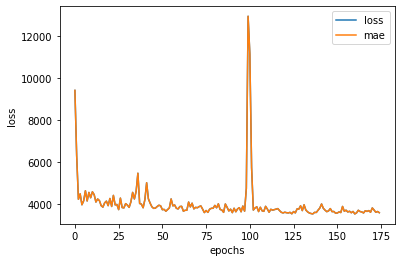

In [ ]:
#Plot history (also known as a loss curve or training curve)
pd.DataFrame(history2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


Prepocessing (Normalization and Standardizing)

In [ ]:
#Read Data from Github
insurance2 = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create Column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
    )
#create X & y
X = insurance2.drop("charges", axis=1)
y = insurance2["charges"]

#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state=42)

#fit the column transformer
ct.fit(X_train)

#Tansform training and test data with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
#sets seed
tf.random.set_seed(42)
#Create model
insurance_scale_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
#Compile model
insurance_scale_model.compile(loss= tf.keras.losses.mae,
                              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                              metrics=["mae"])
#Fit model
insurance_scale_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13324.9395 - mae: 13324.9395
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12977.0029 - mae: 12977.0029
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 10871.4424 - mae: 10871.4424
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 8117.6250 - mae: 8117.6250
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7754.9922 - mae: 7754.9922
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7502.5508 - mae: 7502.5508
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7180.7627 - mae: 7180.7627
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6796.8955 - mae: 6796.8955
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6286.2715 - mae: 6286.2715
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5558.1367 - mae: 555

In [ ]:
#Evaluate our insurace model
insurance_scale_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3169.0093 - mae: 3169.0093


[3169.00927734375, 3169.00927734375]